In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:186: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'n

In [2]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
# X = minmax_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=2000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

/home/peyote/.conda/envs/tf3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

# PPinv = SSNP()
# PPinv = PPinvWrapper(UMAP(n_components=2), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), RBFinv())
PPinv = PPinvWrapper(UMAP(n_components=2), Pinv_ilamp())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

In [4]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 10


Loss: 1.4767: 100%|██████████| 150/150 [00:02<00:00, 61.97it/s]


In [5]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

fast strategy


100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


fast strategy


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
slow strategy
slow strategy
slow strategy
slow strategy
slow strategy


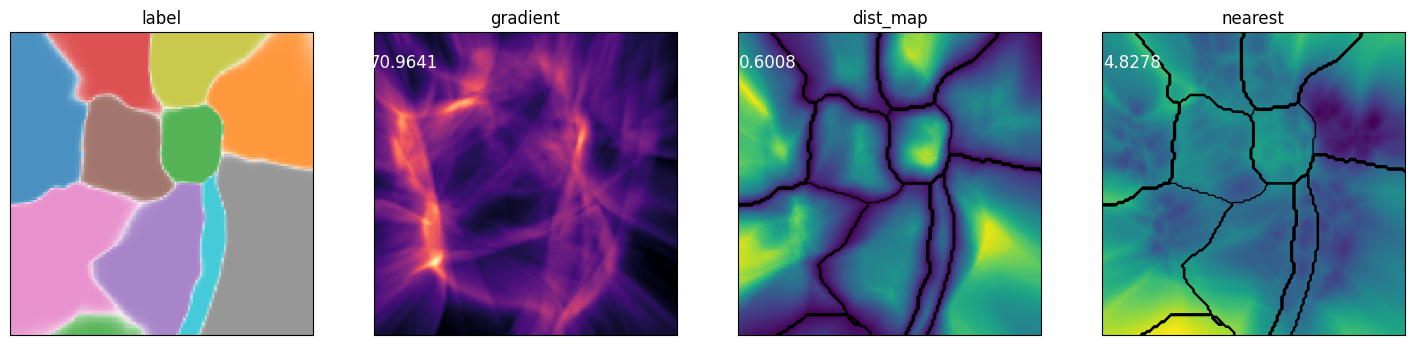

In [ ]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

slow strategy
fast strategy


[(-5.0, 129.0), (-5.0, 129.0)]

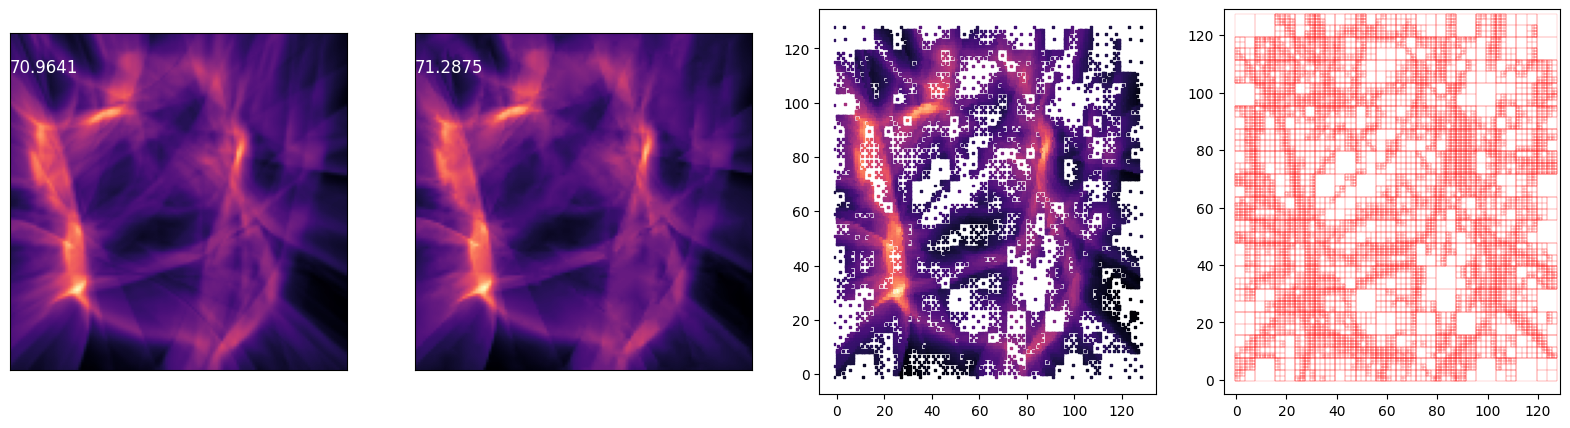

In [ ]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 128
threshold = 0.1
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=16, threshold=threshold) ## threshold at most 0.2
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

# fig.savefig('results/figures/spares.pdf', dpi=300)


In [ ]:
# conten_list = ['label', 'gradient_reduced', 'label_roundtirp']
# fast_strategy = True
# fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# GRID = 150
# # builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# # builder.plot_training_data(ax=ax[0])
# _, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)
# _, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, reduced=True) ## threshold at most 0.2
# # builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

# threshold = 0
# for item in sparse:
#     if item[-2] > threshold and item[-1] > threshold:
#         w, h = item[-1], item[-2]
#         ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
#         # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
#         # ax.set_xlim(0, GRID)
#         # ax.set_ylim(0, GRID)
#     # else:
#     #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
# ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

# # fig.savefig('results/figures/spares.pdf', dpi=300)

slow strategy
slow strategy
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy


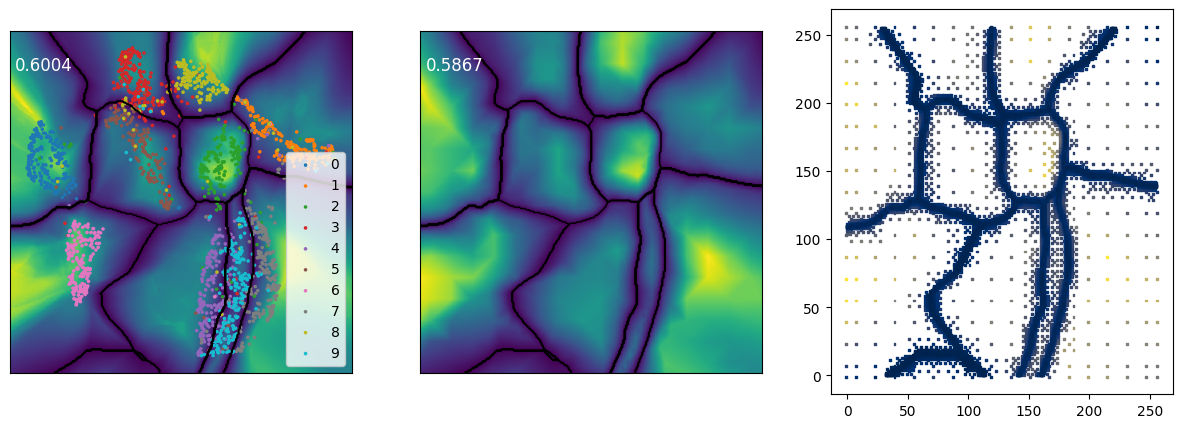

In [ ]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_dist_map(ax[0],  fast=False, grid=256)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=16)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)


slow strategy
slow strategy
fast strategy
fast strategy


[(-1.0, 128.0), (-1.0, 128.0)]

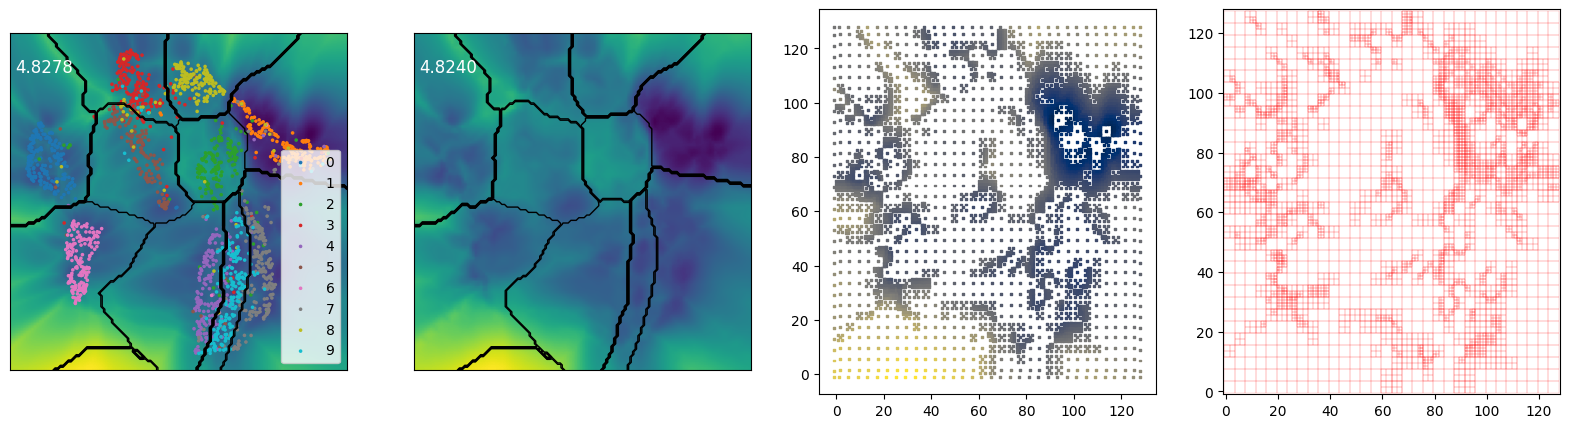

In [ ]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 128

builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.15)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(-1, GRID), ylim=(-1, GRID))

# fig.savefig('figures/spares.png', dpi=300)
